# Heart Disease EDA and Detection

## Data ingestion and cleaning

In [6]:
import numpy as np
import pandas as pd

cols = ['age', 'sex', 'chest_pain', 'resting_bp', 'cholestoral', 'fbs', 'resting_ecg', 'max_pulse',
           'angina', 'oldpeak', 'slope', 'major_vessles', 'thal', 'target']

data = pd.read_csv(r'C:\Users\amiab\OneDrive\Documents\Data Science\Projects\Heart disease detection\dataset\heart.csv', 
                   names = cols, header = 0)

#sex 1 = M and 0 = F

data.head()

,age,sex,chest_pain,resting_bp,cholestoral,fbs,resting_ecg,max_pulse,angina,oldpeak,slope,major_vessles,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [7]:
for col in data.columns:
    print(col, data[col].unique())

age [52 53 70 61 62 58 55 46 54 71 43 34 51 50 60 67 45 63 42 44 56 57 59 64
 65 41 66 38 49 48 29 37 47 68 76 40 39 77 69 35 74]
sex [1 0]
chest_pain [0 1 2 3]
resting_bp [125 140 145 148 138 100 114 160 120 122 112 132 118 128 124 106 104 135
 130 136 180 129 150 178 146 117 152 154 170 134 174 144 108 123 110 142
 126 192 115  94 200 165 102 105 155 172 164 156 101]
cholestoral [212 203 174 294 248 318 289 249 286 149 341 210 298 204 308 266 244 211
 185 223 208 252 209 307 233 319 256 327 169 131 269 196 231 213 271 263
 229 360 258 330 342 226 228 278 230 283 241 175 188 217 193 245 232 299
 288 197 315 215 164 326 207 177 257 255 187 201 220 268 267 236 303 282
 126 309 186 275 281 206 335 218 254 295 417 260 240 302 192 225 325 235
 274 234 182 167 172 321 300 199 564 157 304 222 184 354 160 247 239 246
 409 293 180 250 221 200 227 243 311 261 242 205 306 219 353 198 394 183
 237 224 265 313 340 259 270 216 264 276 322 214 273 253 176 284 305 168
 407 290 277 262 195 166 178 141

In [8]:
data.isnull().sum()

# the dataset has no null values

age              0
sex              0
chest_pain       0
resting_bp       0
cholestoral      0
fbs              0
resting_ecg      0
max_pulse        0
angina           0
oldpeak          0
slope            0
major_vessles    0
thal             0
target           0
dtype: int64

## Exploratory Data Analysis

In [9]:
import seaborn as sns
from matplotlib import pyplot as plt

First we'll find the correlation of the dataset and analyse how the attributes are related to each other.

Text(0.5, 1.0, 'Correlation among all the attributes')

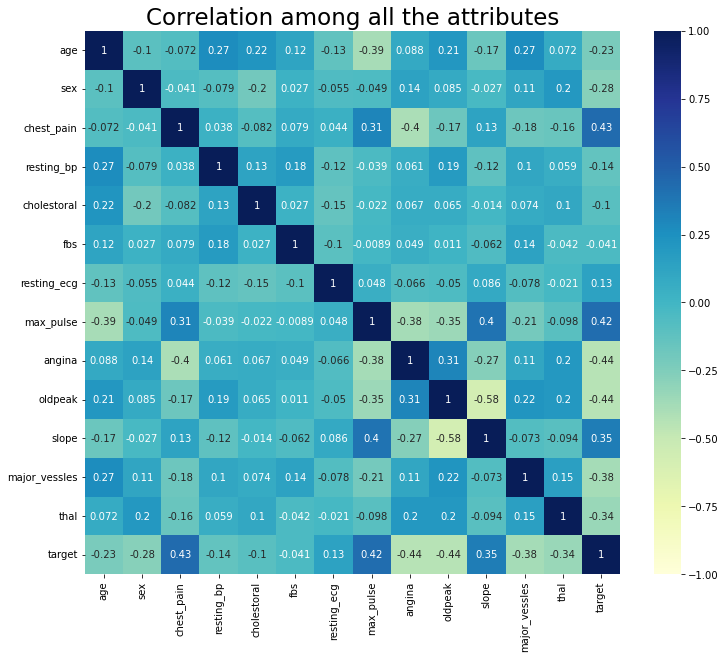

In [10]:
plt.figure(figsize=(12, 10))
p = sns.heatmap(data.corr(), vmin=-1, vmax=1, cmap='YlGnBu',annot=True)
plt.title("Correlation among all the attributes", fontsize = 23)

In [ ]:
#pairplot

sns.pairplot(data, hue = 'target')

From the pair plot we can analyse that most of the attributes are overlapping.

In [ ]:
plt.figure(figsize=(12,6))
p = sns.countplot(x="sex", data = data, hue='target', palette='bright')
plt.xlabel('Gender', fontsize = 20)
plt.ylabel('Count', fontsize = 20)
plt.title("Gender Count based on heart disease", fontsize = 23)

In [ ]:
plt.figure(figsize=(15,7))
p = sns.countplot(x="age", data = data, hue='target', palette='bright')
plt.xlabel('Age', fontsize = 20)
plt.ylabel('Count', fontsize = 20)
plt.title("Age Count based on heart disease", fontsize = 23)

In [ ]:
plt.figure(figsize=(16,8))
p = sns.lineplot(data = data, x = 'age', y = 'chest_pain', err_style="bars", hue = 'sex',
                 palette='bright', ci = 0, legend='full')
plt.xlabel('Age', fontsize = 20)
plt.ylabel('Chest Pain', fontsize = 20)
plt.title("Age vs Chest Pain", fontsize = 23)

In [ ]:
plt.figure(figsize=(16,8))
p = sns.lineplot(data = data, x = 'age', y = 'cholestoral', err_style="bars", hue = 'sex',
                 palette='bright', ci = 0)
plt.xlabel('Age', fontsize = 20)
plt.ylabel('Cholestoral', fontsize = 20)
plt.title("Age vs Cholestoral", fontsize = 23)

In [ ]:
plt.figure(figsize=(16,8))
p = sns.lineplot(data = data, y = 'max_pulse', x = 'slope',hue = 'target',
                 palette='bright', ci = 65)
plt.xlabel('ST Slope', fontsize = 20)
plt.ylabel('Max Pulse', fontsize = 20)
plt.title("ST Slope vs Max Pulse", fontsize = 23)

In [ ]:
#'resting_bp', 'cholestoral', 'max_pulse'
plt.figure(figsize=(14, 6))
sns.relplot(data=data, x='resting_bp', y='max_pulse', hue='target', size='cholestoral',
            sizes=(20, 300), alpha=.5, palette="muted", 
            height=6)
plt.xlabel("Resting BP", fontsize = 20)
plt.ylabel("Max Pulse", fontsize = 20)
plt.title("Max Pulse vs Resting BP", fontsize = 23)

In [ ]:
from sklearn.model_selection import train_test_split
X = data.drop('target', axis=1)
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=47)
X_val = X_train[822:]
y_val = y_train[822:]

In [ ]:
print(X.shape, y.shape, X_train.shape, X_test.shape, y_train.shape, y_test.shape, X_val.shape, y_val.shape)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=1)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
print('Accuracy = ', model.score(X_val, y_val)*100, '%')

In [ ]:
import joblib as jl

jl.dump(model, 'heart_disease_detector_model.pkl')